****
# Introduction #
****
**This Notebook aims to classifiy the loan status with high accuracy**

**If you liked this Notebook or found this helpful kindly Upvote!!**

In [1]:
# importing
import pandas as pd
import numpy as np

****
# Reading and displaying Data #
****

In [2]:
df=pd.read_csv(r'/kaggle/input/loan-approval-classification-data/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


****
# Dataset Description #
****
1. person_age: Age of the person
 
2. person_gender: Gender of the person

4. person_education: Highest education level

5. person_income: Annual income	

6. person_emp_exp: Years of employment experience	

7. person_home_ownership: Home ownership status (e.g., rent, own, mortgage)	

8. loan_amnt: Loan amount requested	

9. loan_intent: Purpose of the loan	

10. loan_int_rate: Loan interest rate	

11. loan_percent_income: Loan amount as a percentage of annual income	

12. cb_person_cred_hist_length: Length of credit history in years	

13. credit_score: Credit score of the person

14. previous_loan_defaults_on_file: Indicator of previous loan defaults	

15. **loan_status (target variable):** Loan approval status: 1 = approved; 0 = rejected	

****
# Data Visualization #
****

In [3]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

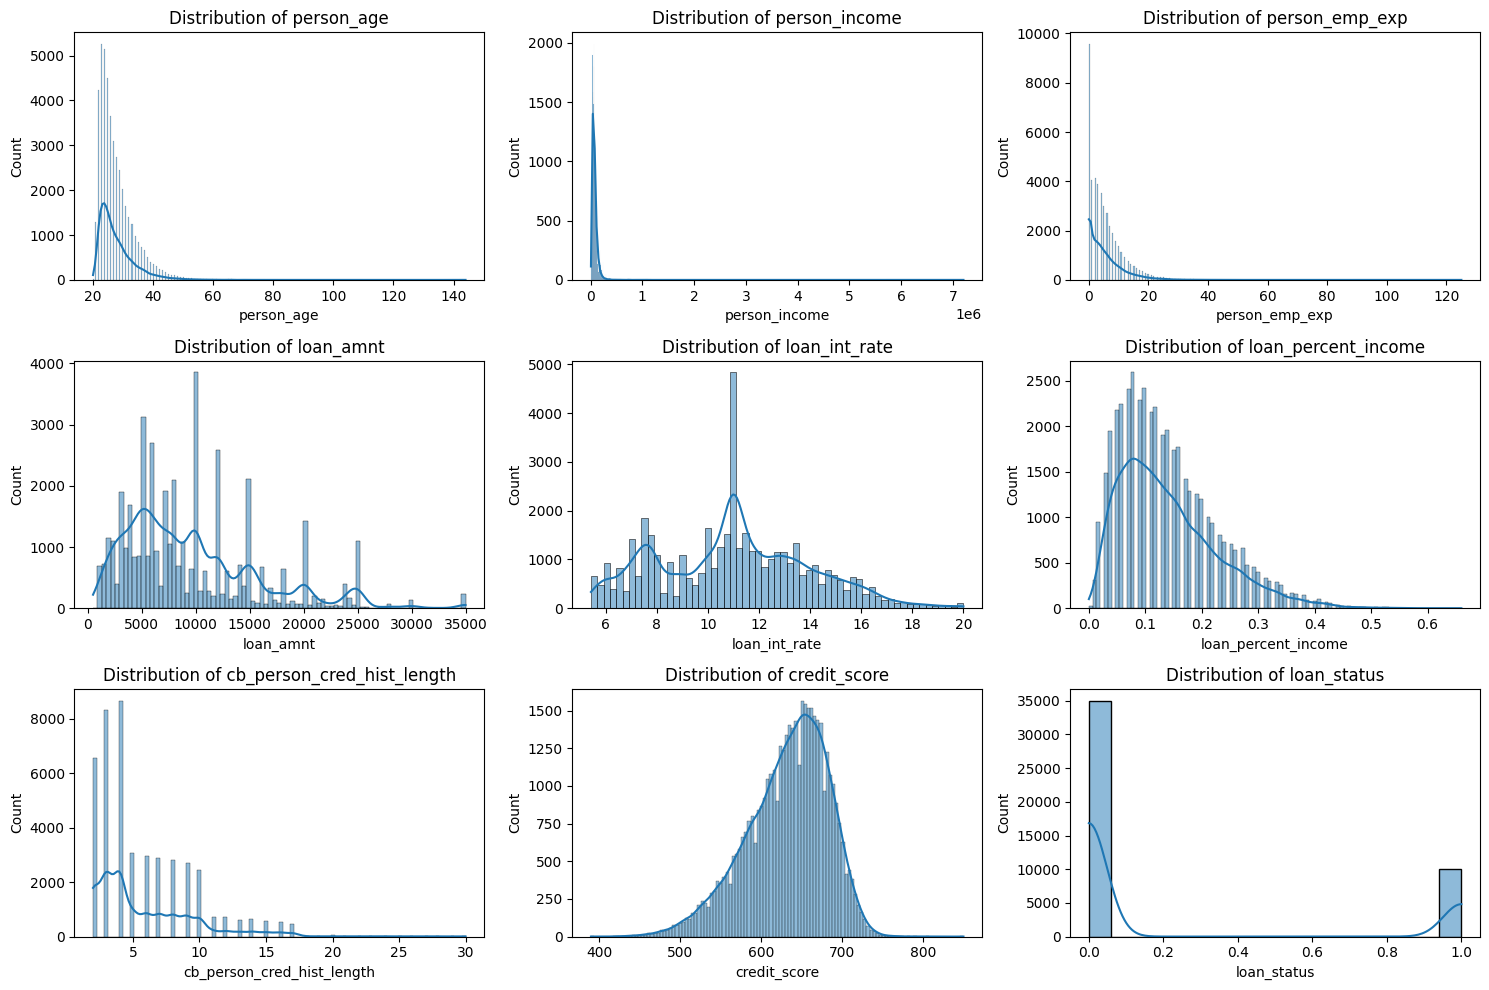

In [6]:
# First let us look at how our continuous variables are distributed

fig,ax=plt.subplots(3,3,figsize=(15,10))
ax=ax.flatten()
i=0
for col in df.columns[df.dtypes.apply(lambda x: x in ['float64', 'int64'])]:
    if i < len(ax):
        sns.histplot(data=df, x=col, kde=True, ax=ax[i])
        ax[i].set_title(f"Distribution of {col}")
        i += 1
plt.tight_layout()
plt.show()
    

1. Features such as person_age, person_income, person_emp_exp, and loan_percent_income are right-skewed, meaning the bulk of the data is concentrated on the lower end of these values. This indicates that most individuals fall within a lower range for these attributes (e.g., younger ages, lower incomes, shorter employment experience), while a smaller number have higher values, creating a long tail to the right.
2. Credit_Score is showing a normal distribution, we can use a regression algo to predict it for fun.This feature follows the 68-95-99.7 rule.

In [7]:
df.dtypes[df.dtypes == 'object'].count()

5

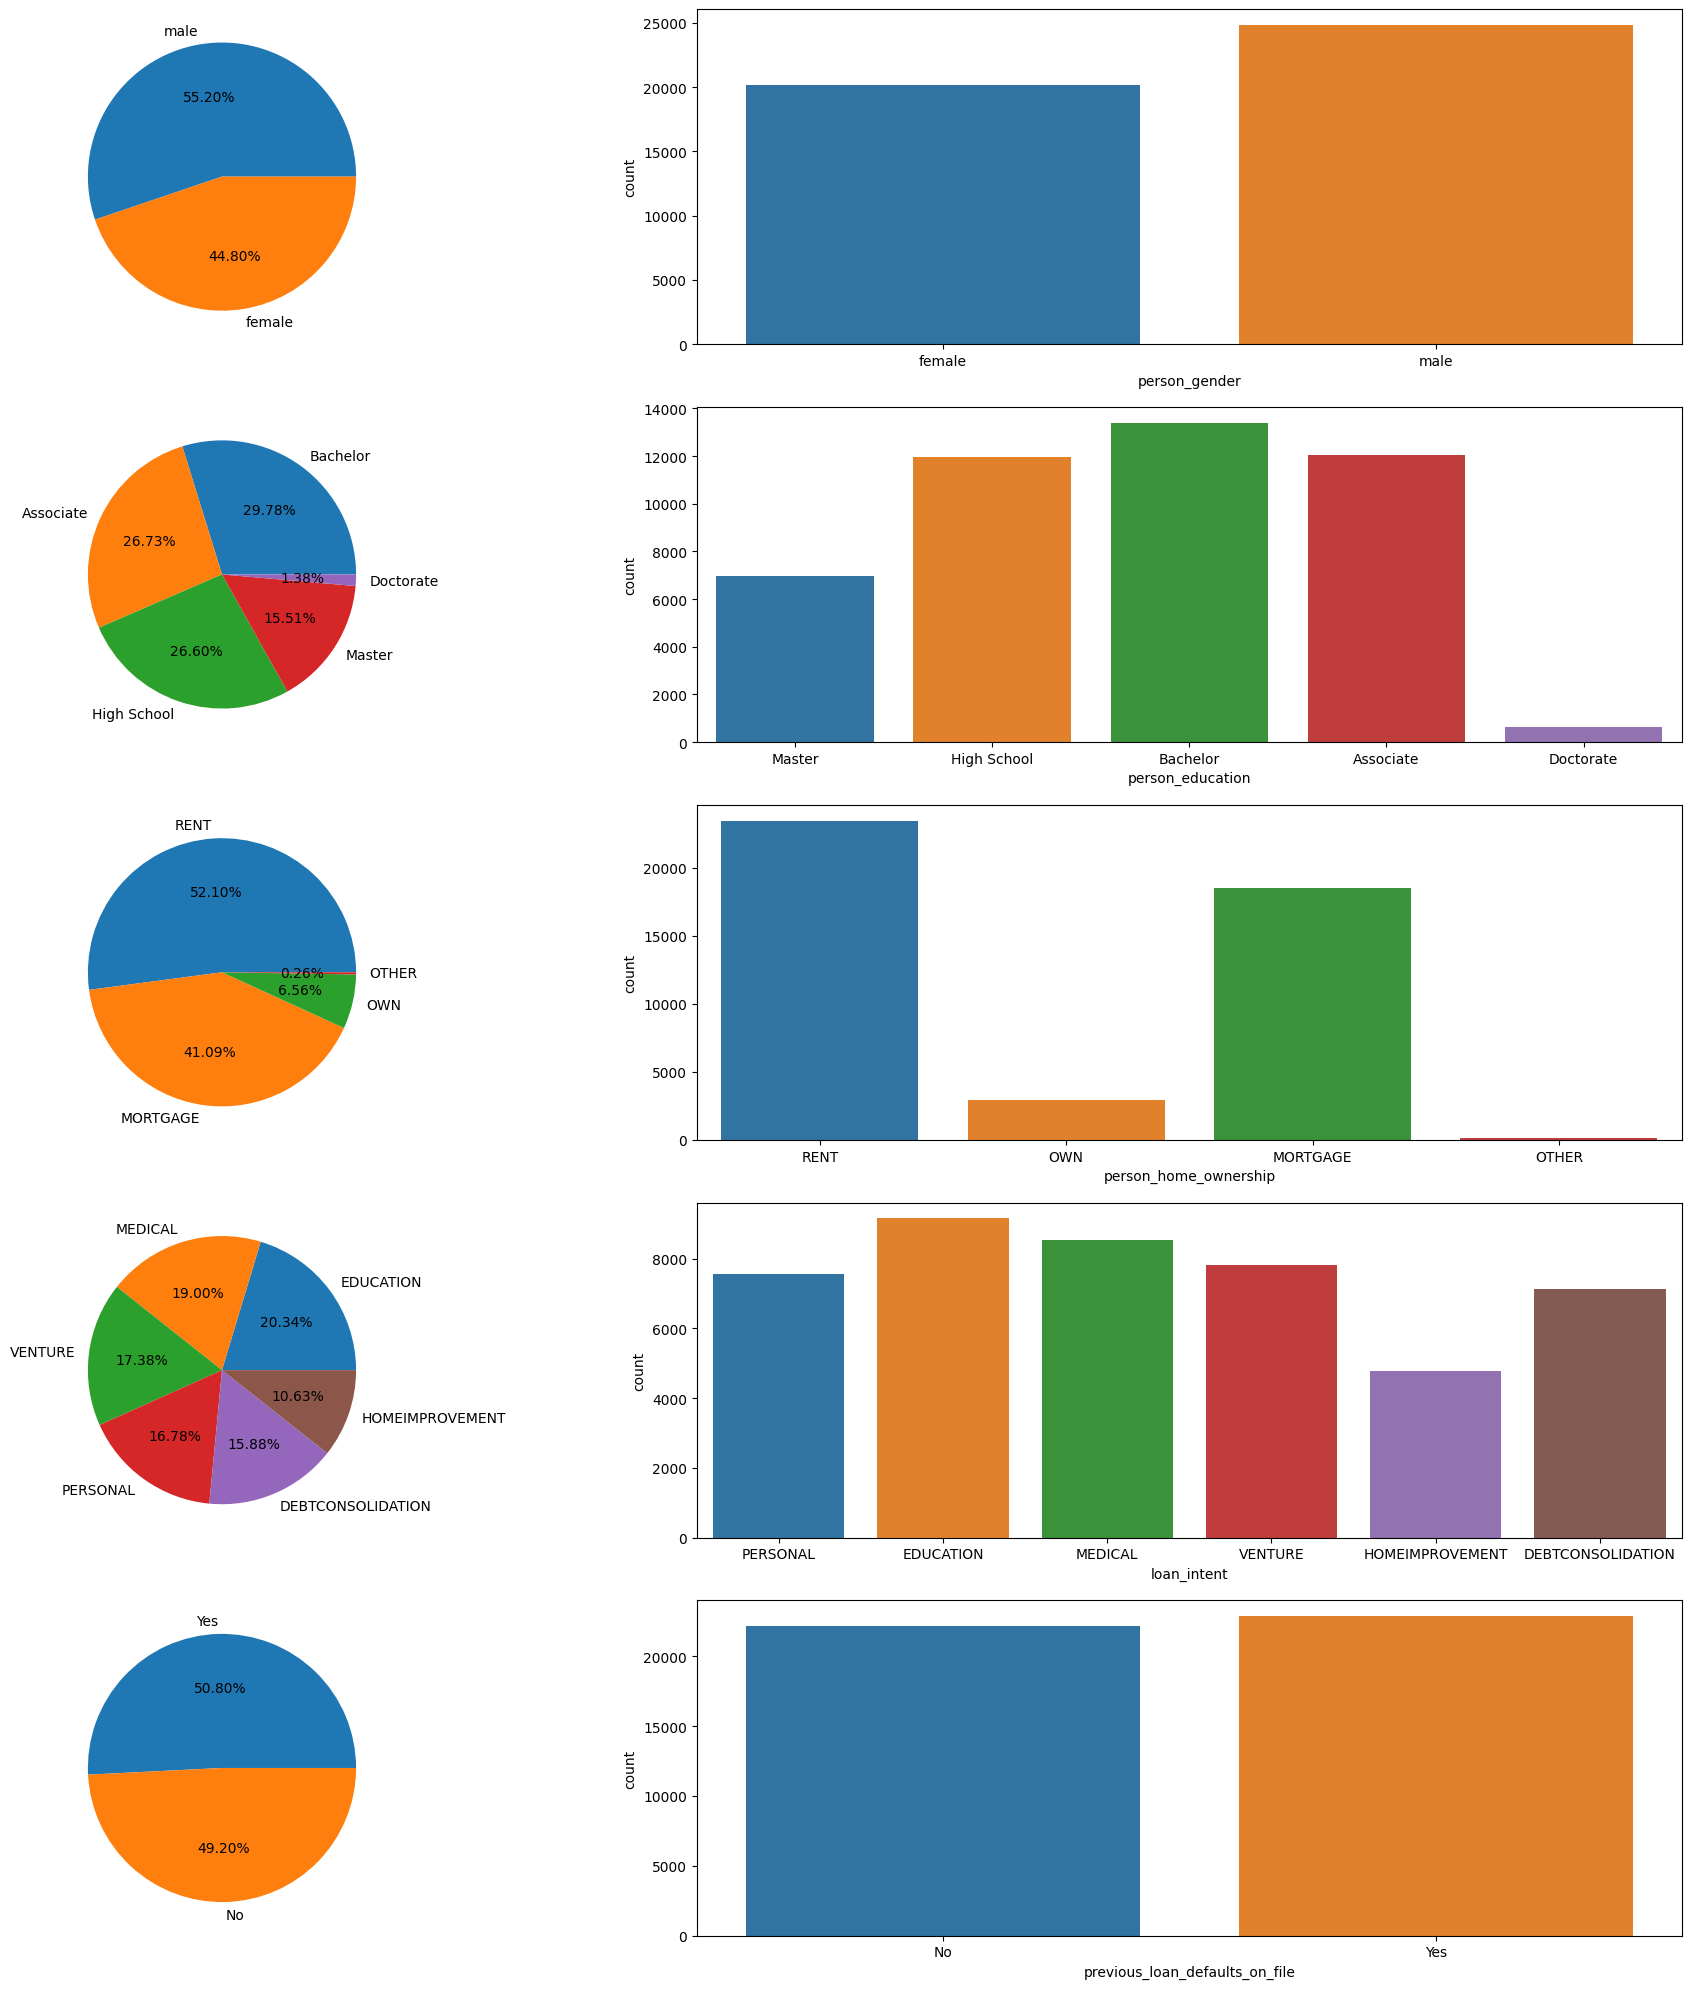

In [8]:
# Now let us take a look at how our categorical variables are distributed using both a pie chart as well as a bar plot

fig,ax=plt.subplots(5,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns[df.dtypes=='object']:
    tdf=df[col].value_counts().reset_index()
    if i< len(ax):
        ax[i].pie(x=tdf['count'],labels=tdf[col],autopct='%.2f%%')
        i+=1
        if i<len(ax):
            sns.countplot(data=df,x=col,ax=ax[i])
            i+=1
plt.tight_layout()
plt.show()

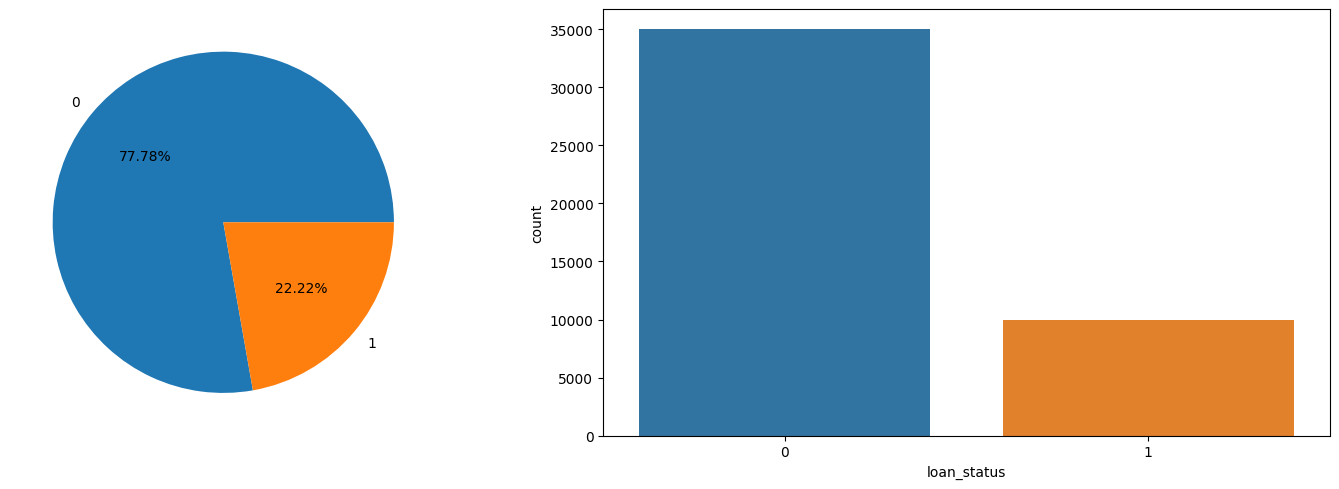

In [9]:
# Finally let us take a look at how our Target variable is distributed and find out if our data is imbalanced or balanced

tdf=df['loan_status'].value_counts().reset_index()
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].pie(x=tdf['count'],labels=tdf['loan_status'],autopct='%.2f%%')
sns.countplot(x=df['loan_status'],ax=ax[1])
plt.tight_layout()
plt.show()

**It appears that our data is imbalanced, we have more loan rejections than loan acceptance :(**

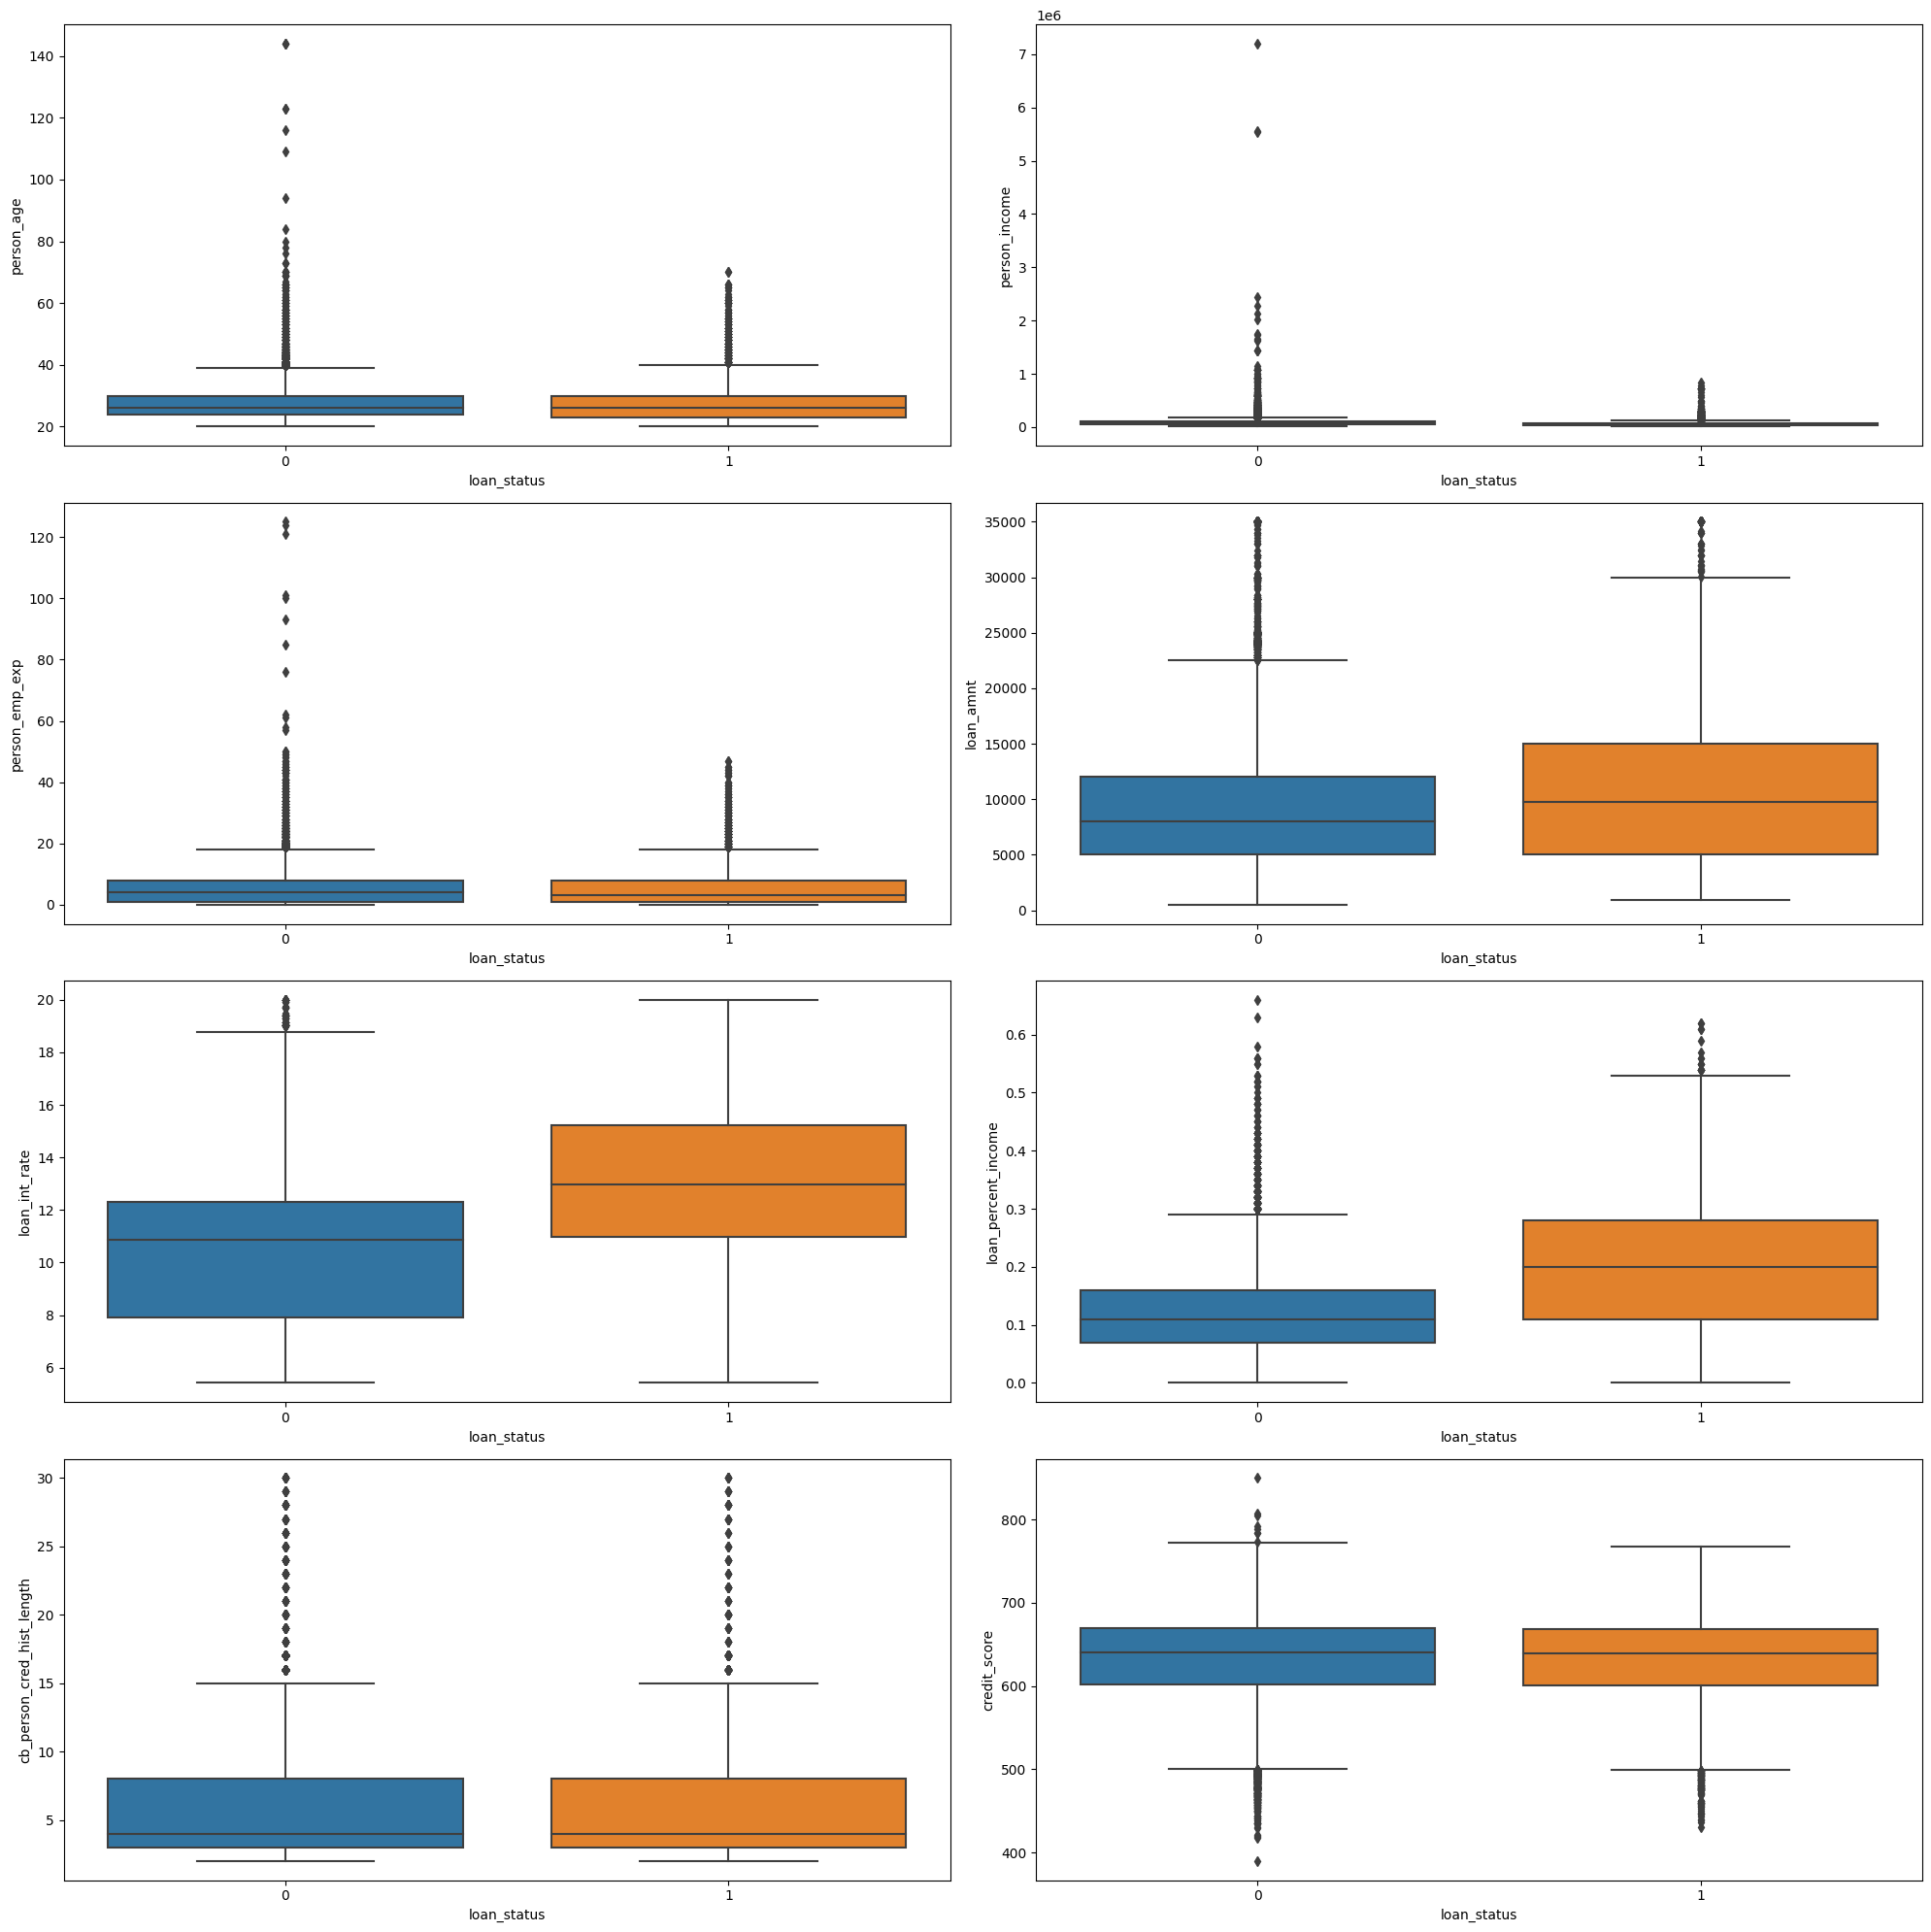

In [10]:
# Well it is sad our data is imbalanced
# Now lets us plot a boxplot (only for 30 percent of the data) for our features with continuous variables and have our target variable as our differentiator

cols=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income',
      'cb_person_cred_hist_length','credit_score']
fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df,y=col,x='loan_status',ax=ax[i])
plt.tight_layout()
plt.show()
    

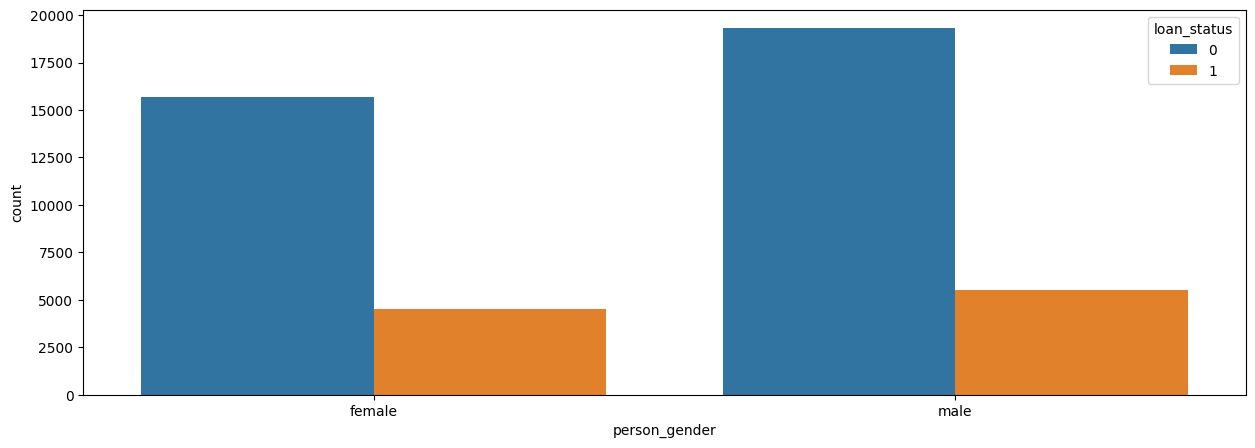

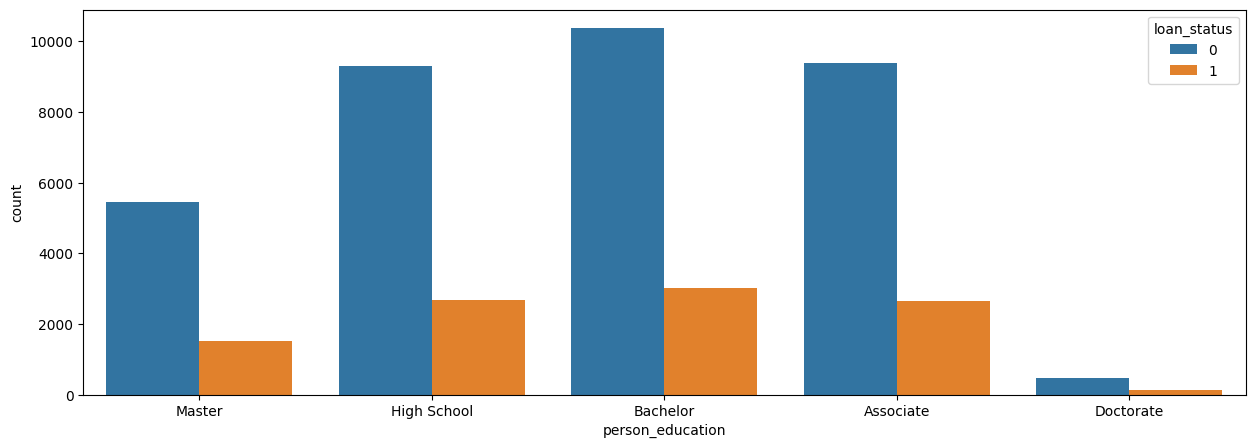

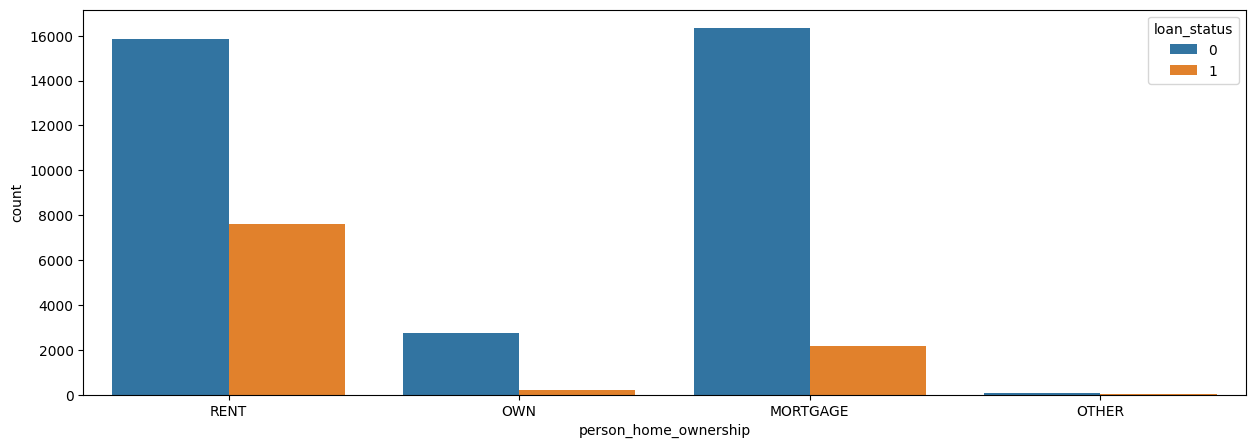

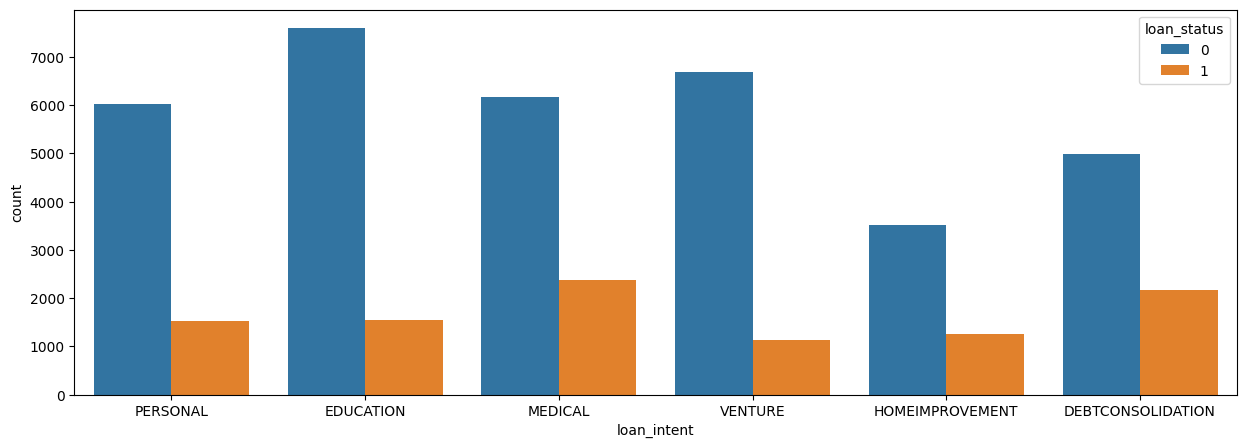

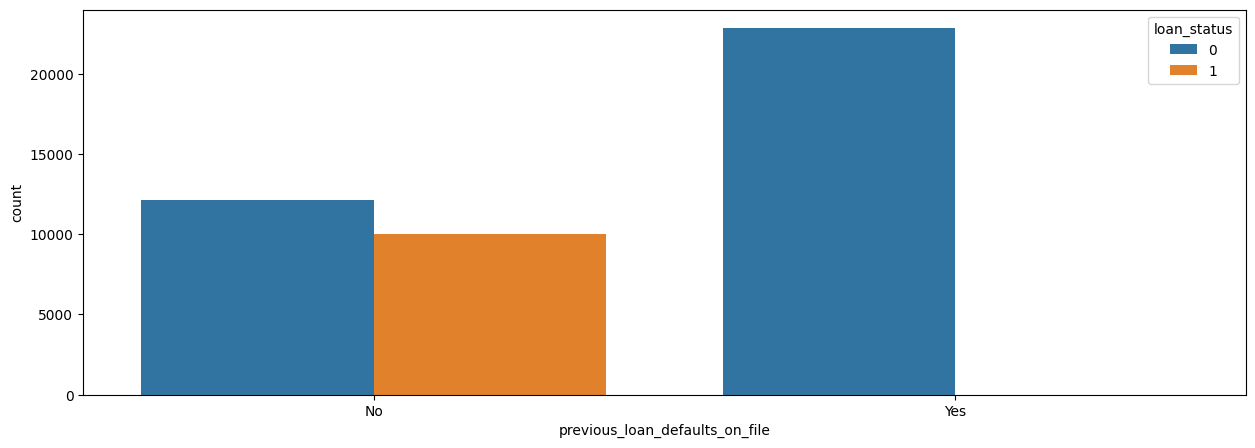

In [11]:
# Let us see how our loan status is realted to our categorical varibles
# We use a barpolot for that

for col in df.columns[df.dtypes=='object']:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df,x=col,hue=df['loan_status'])
    plt.show()

****
# Data Preprocessing #
****

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [13]:
# checking for null values
df.isnull().any()

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
loan_status                       False
dtype: bool

In [14]:
# no null values
# dropping duplicates
df.drop_duplicates(keep='first',inplace=True)

In [15]:
# Encoding all the categorical variables using label encoder so that our data can pass through our model
# importing
from sklearn.preprocessing import LabelEncoder
# checking the different values in our categorical columns
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n')

person_gender
male      24841
female    20159
Name: count, dtype: int64 

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 



In [16]:
# Encoding the above columns using label encoder
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

In [17]:
# We have the data according to the format we want
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

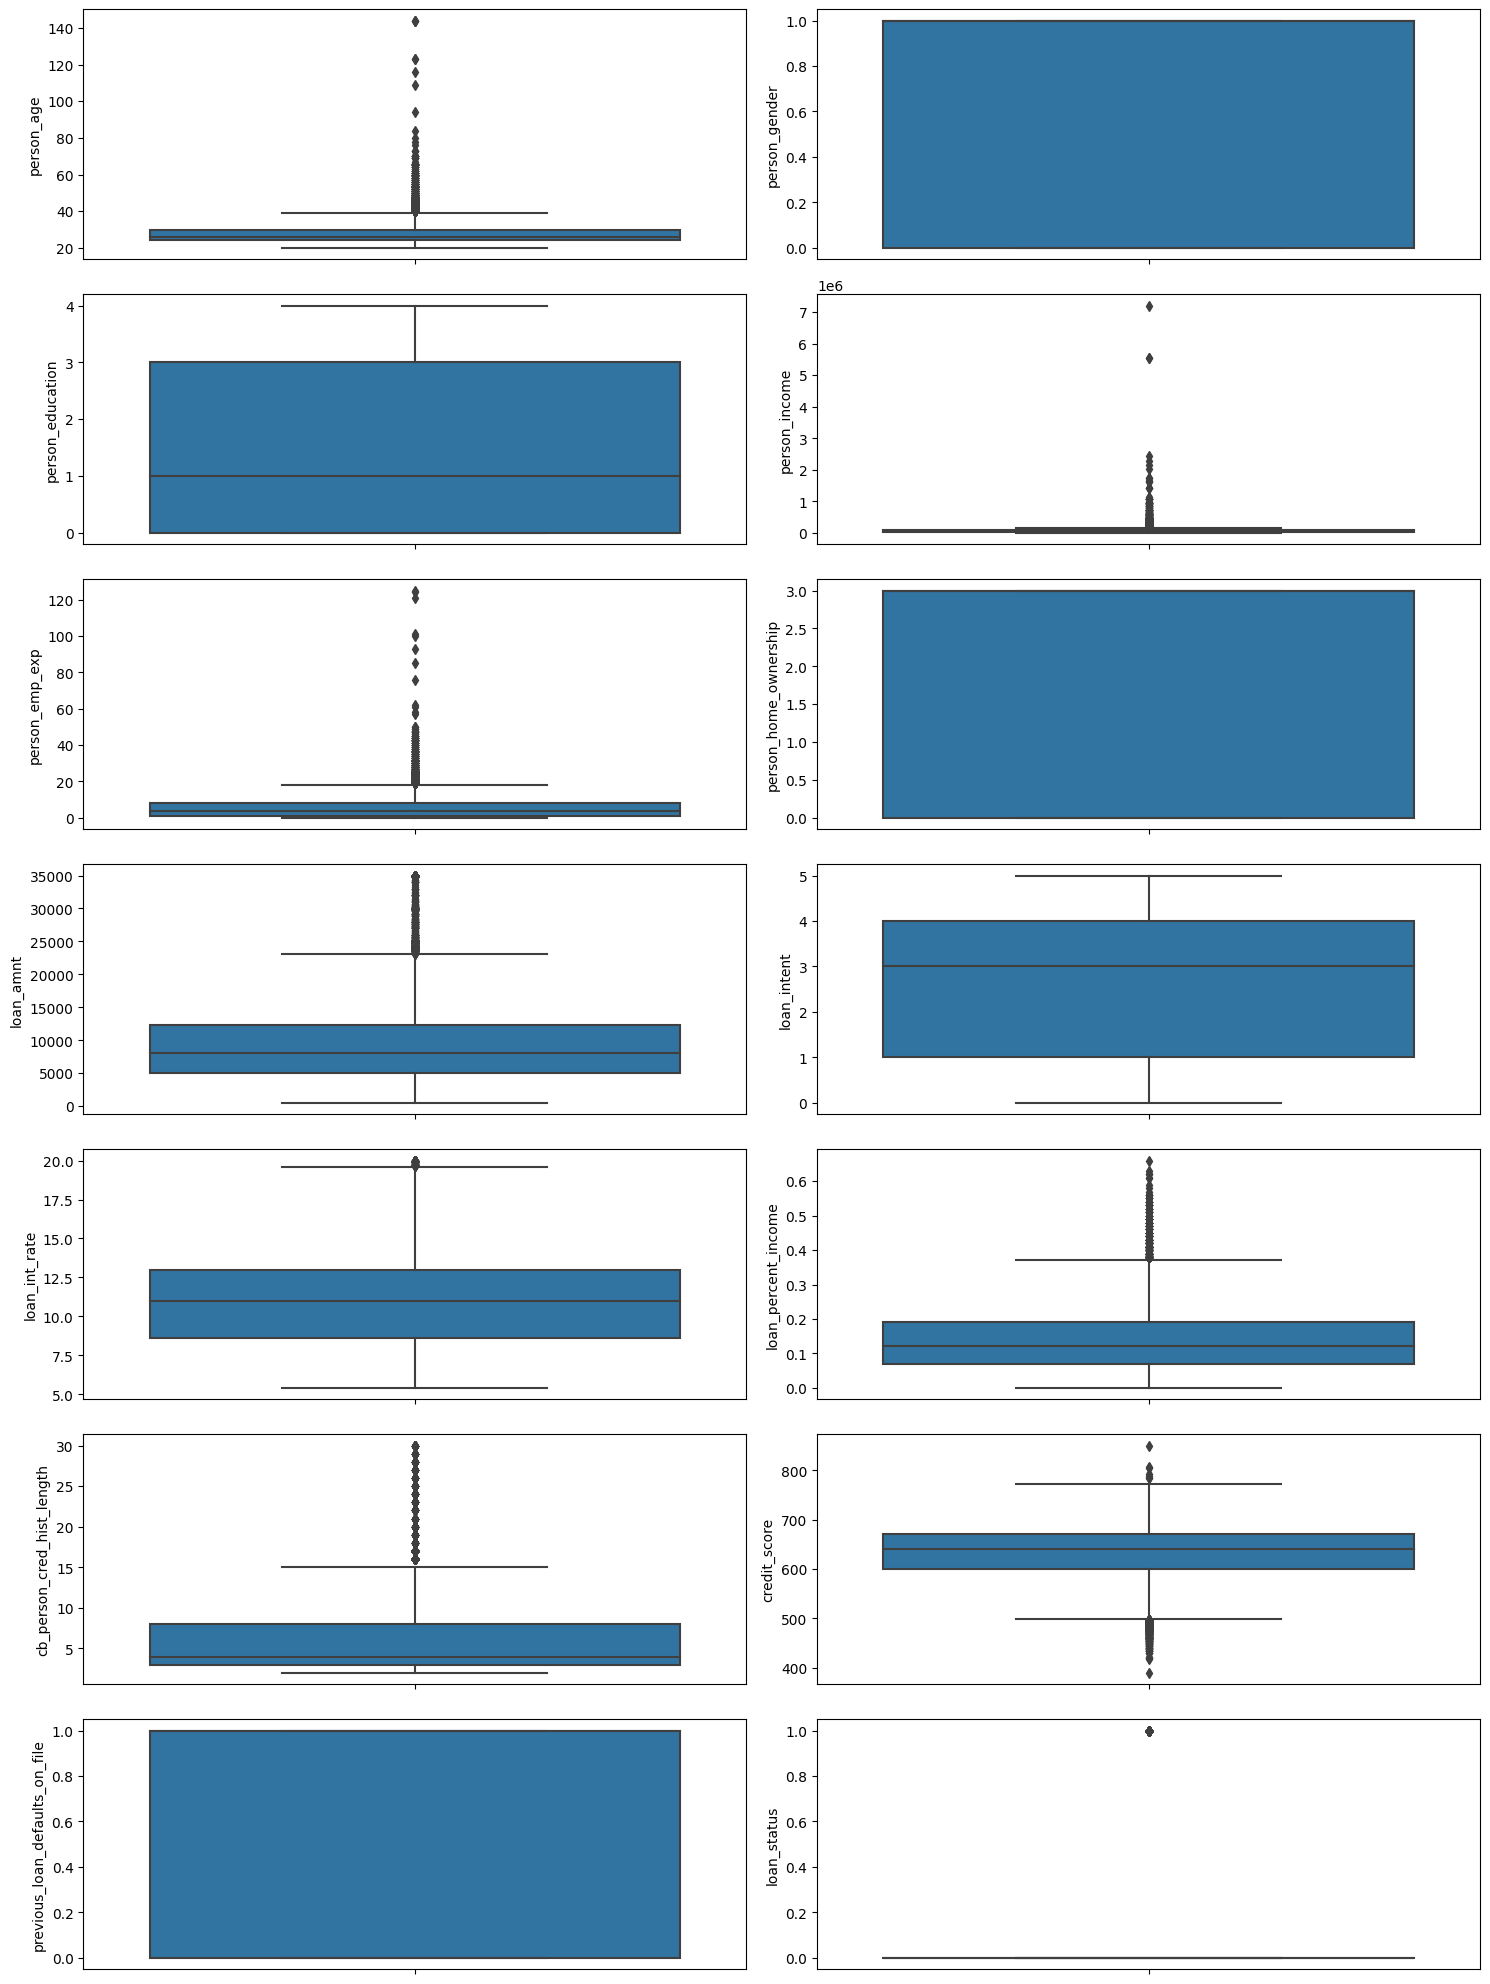

In [18]:
# Removing outliers
# We will use a box plot to visiualize outliers and remove them using IQR method

fig,ax=plt.subplots(7,2,figsize=(15,20))
ax=ax.flatten()
i=0
for col in df.columns:
    if i<len(ax):
        sns.boxplot(data=df,y=col,ax=ax[i])
        i+=1
plt.tight_layout()
plt.show()

In [19]:
# Removing outliers

cols=['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income',
      'cb_person_cred_hist_length','credit_score']

for col in cols:
    q1=df[col].quantile(0.25) # 1st quartile
    q3=df[col].quantile(0.75) # 3rd quartile
    iqr=q3-q1 # inter quartile range
    lb=q1-1.5*iqr # lower bound
    ub=q3+1.3*iqr # Upper Bound
    df=df[(df[col]>=lb) & (df[col]<=ub)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34736 entries, 1 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      34736 non-null  float64
 1   person_gender                   34736 non-null  int64  
 2   person_education                34736 non-null  int64  
 3   person_income                   34736 non-null  float64
 4   person_emp_exp                  34736 non-null  int64  
 5   person_home_ownership           34736 non-null  int64  
 6   loan_amnt                       34736 non-null  float64
 7   loan_intent                     34736 non-null  int64  
 8   loan_int_rate                   34736 non-null  float64
 9   loan_percent_income             34736 non-null  float64
 10  cb_person_cred_hist_length      34736 non-null  float64
 11  credit_score                    34736 non-null  int64  
 12  previous_loan_defaults_on_file  34736

****
# Feature Engineering #
****

**This part will only show correlation between variables and mutual information between the features and the target variable. I will not be creating new features**

In [21]:
# importing
from sklearn.feature_selection import mutual_info_classif

In [22]:
# Calculating mutual information
tdf=df.copy()
x=df.drop(columns='loan_status')
y=df['loan_status']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                           Feature  Mutual Information
0   previous_loan_defaults_on_file            0.181777
1                    person_income            0.087262
2                    loan_int_rate            0.071169
3              loan_percent_income            0.054600
4            person_home_ownership            0.031595
5                        loan_amnt            0.015129
6                      loan_intent            0.012829
7                    person_gender            0.004179
8                 person_education            0.004001
9       cb_person_cred_hist_length            0.002168
10                      person_age            0.001745
11                  person_emp_exp            0.000000
12                    credit_score            0.000000


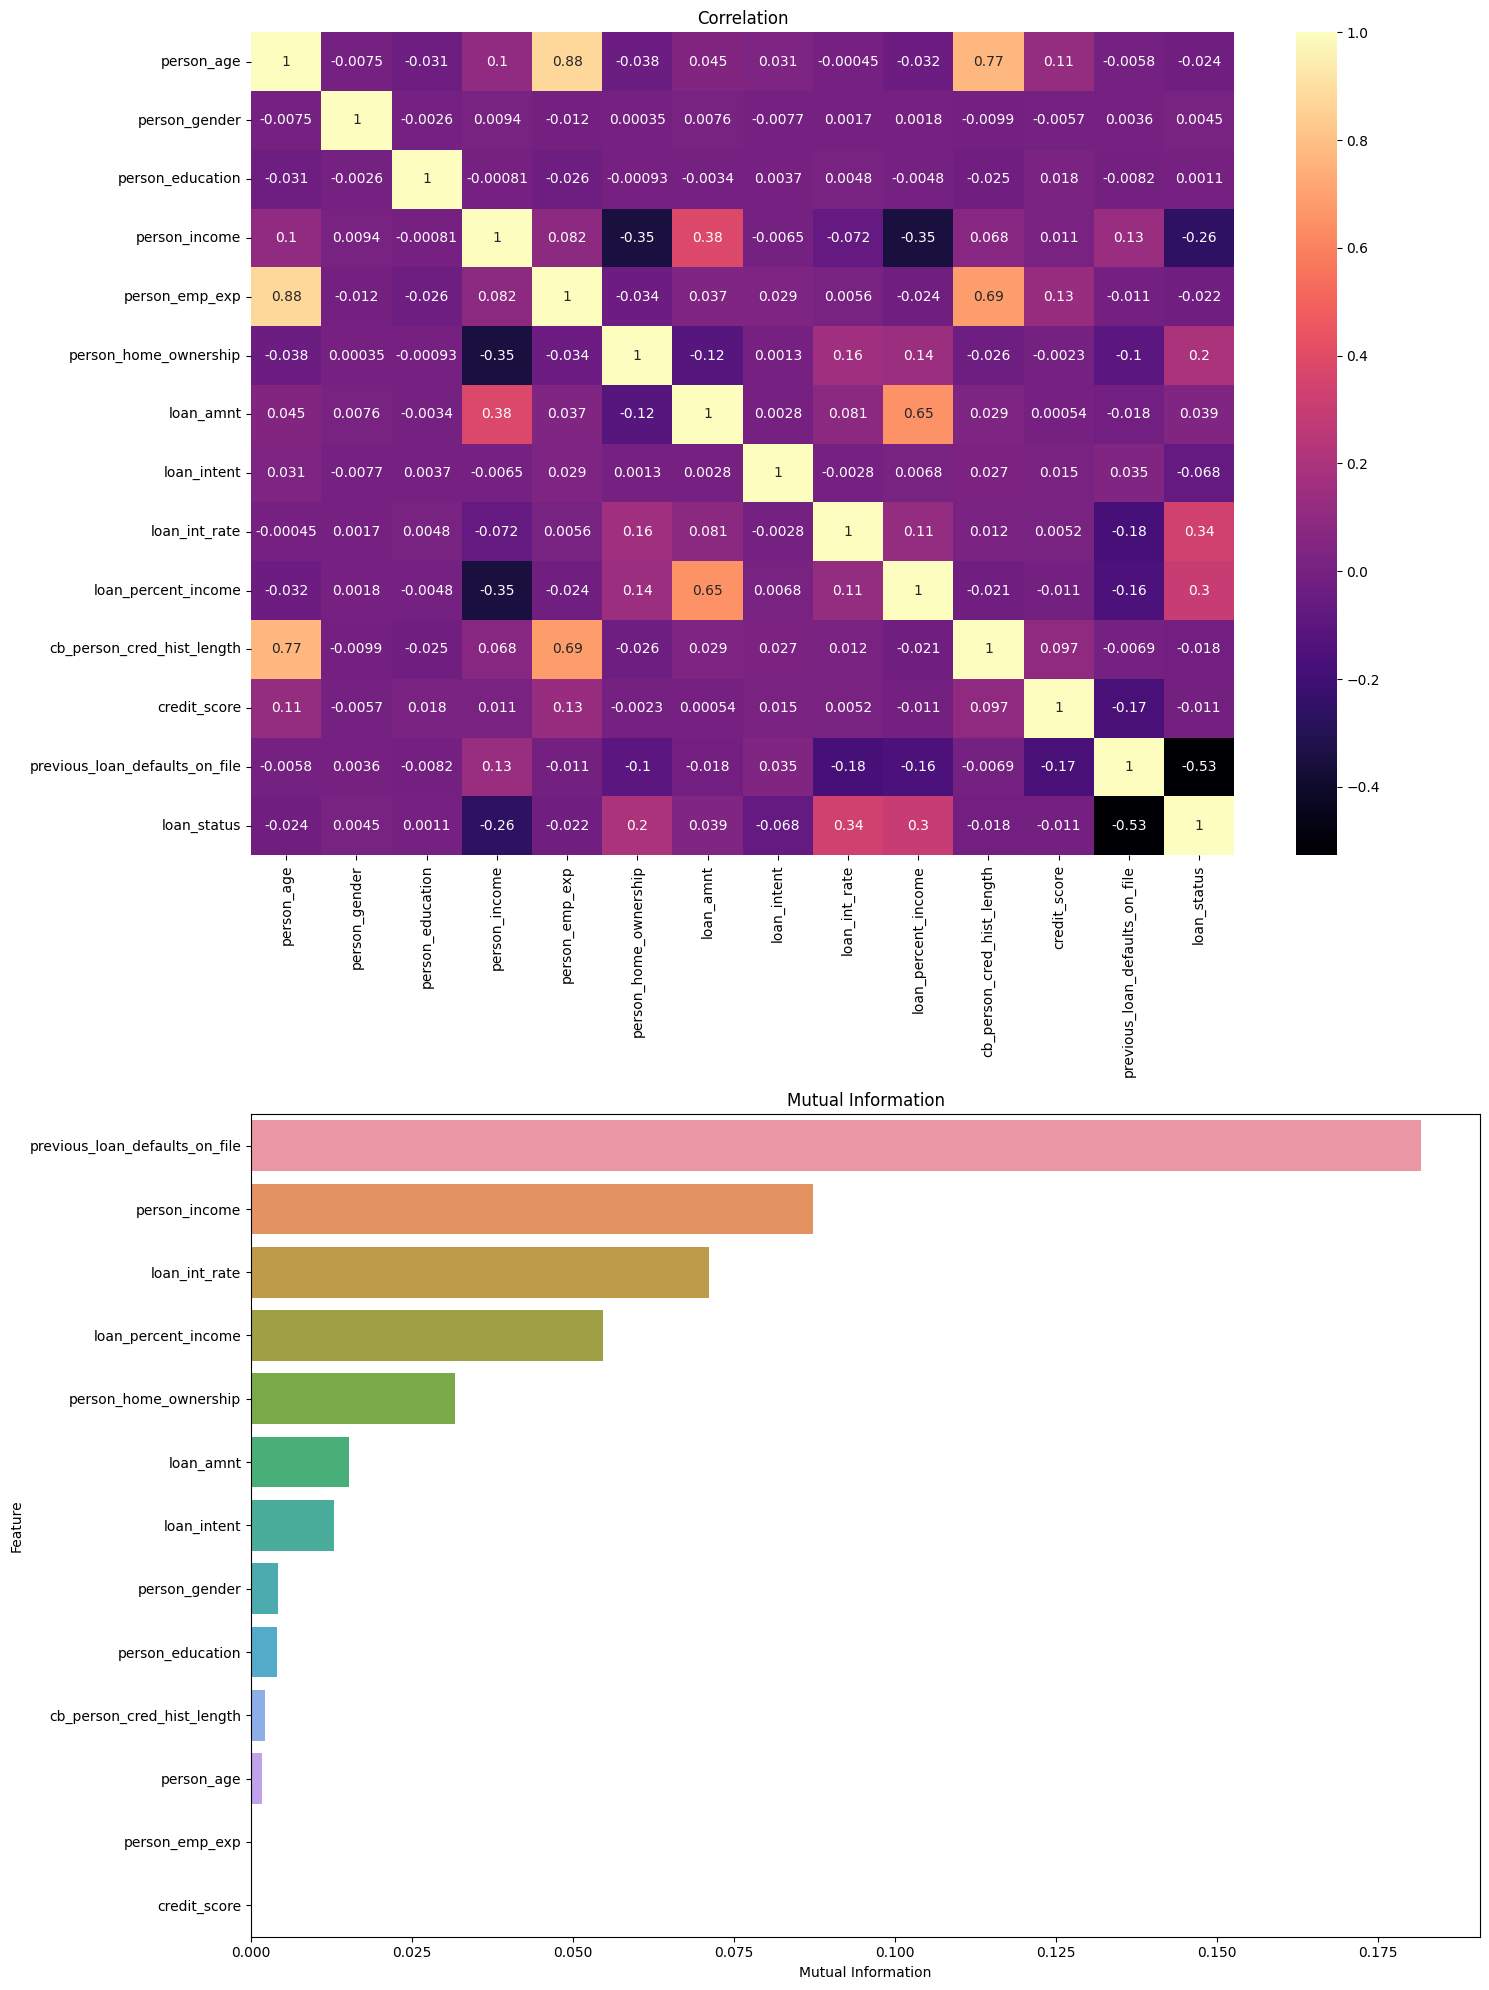

In [23]:
# Displaying correlation and mutual information using heatmap and barplots

fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(tdf.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

**If you want to create new features here are some ideas to play with:**

1. Income-to-Loan Ratio
2. Debt-to-Income Ratio
3. Income per Employment Year
4. Loan Interest Rate to Loan Amount
5. Age Group

****
# Data Preparation #
****

In [24]:
# importing
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop(columns='loan_status')
y=df['loan_status']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20) # splitting the dataset into training and testing
print(x_t.shape,x_te.shape,y_t.shape,y_te.shape)

(26052, 13) (8684, 13) (26052,) (8684,)


****
# Models #
****

In [26]:
# importing
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## Decision Trees ##

In [27]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas

params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.00016859994527544317}
0.9151697912539054


In [28]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(2,101)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 21, 'min_samples_leaf': 29, 'max_features': None, 'criterion': 'gini'}
0.9125211714292869


In [29]:
predt=ndt.predict(x_t)
pred=ndt.predict(x_te)

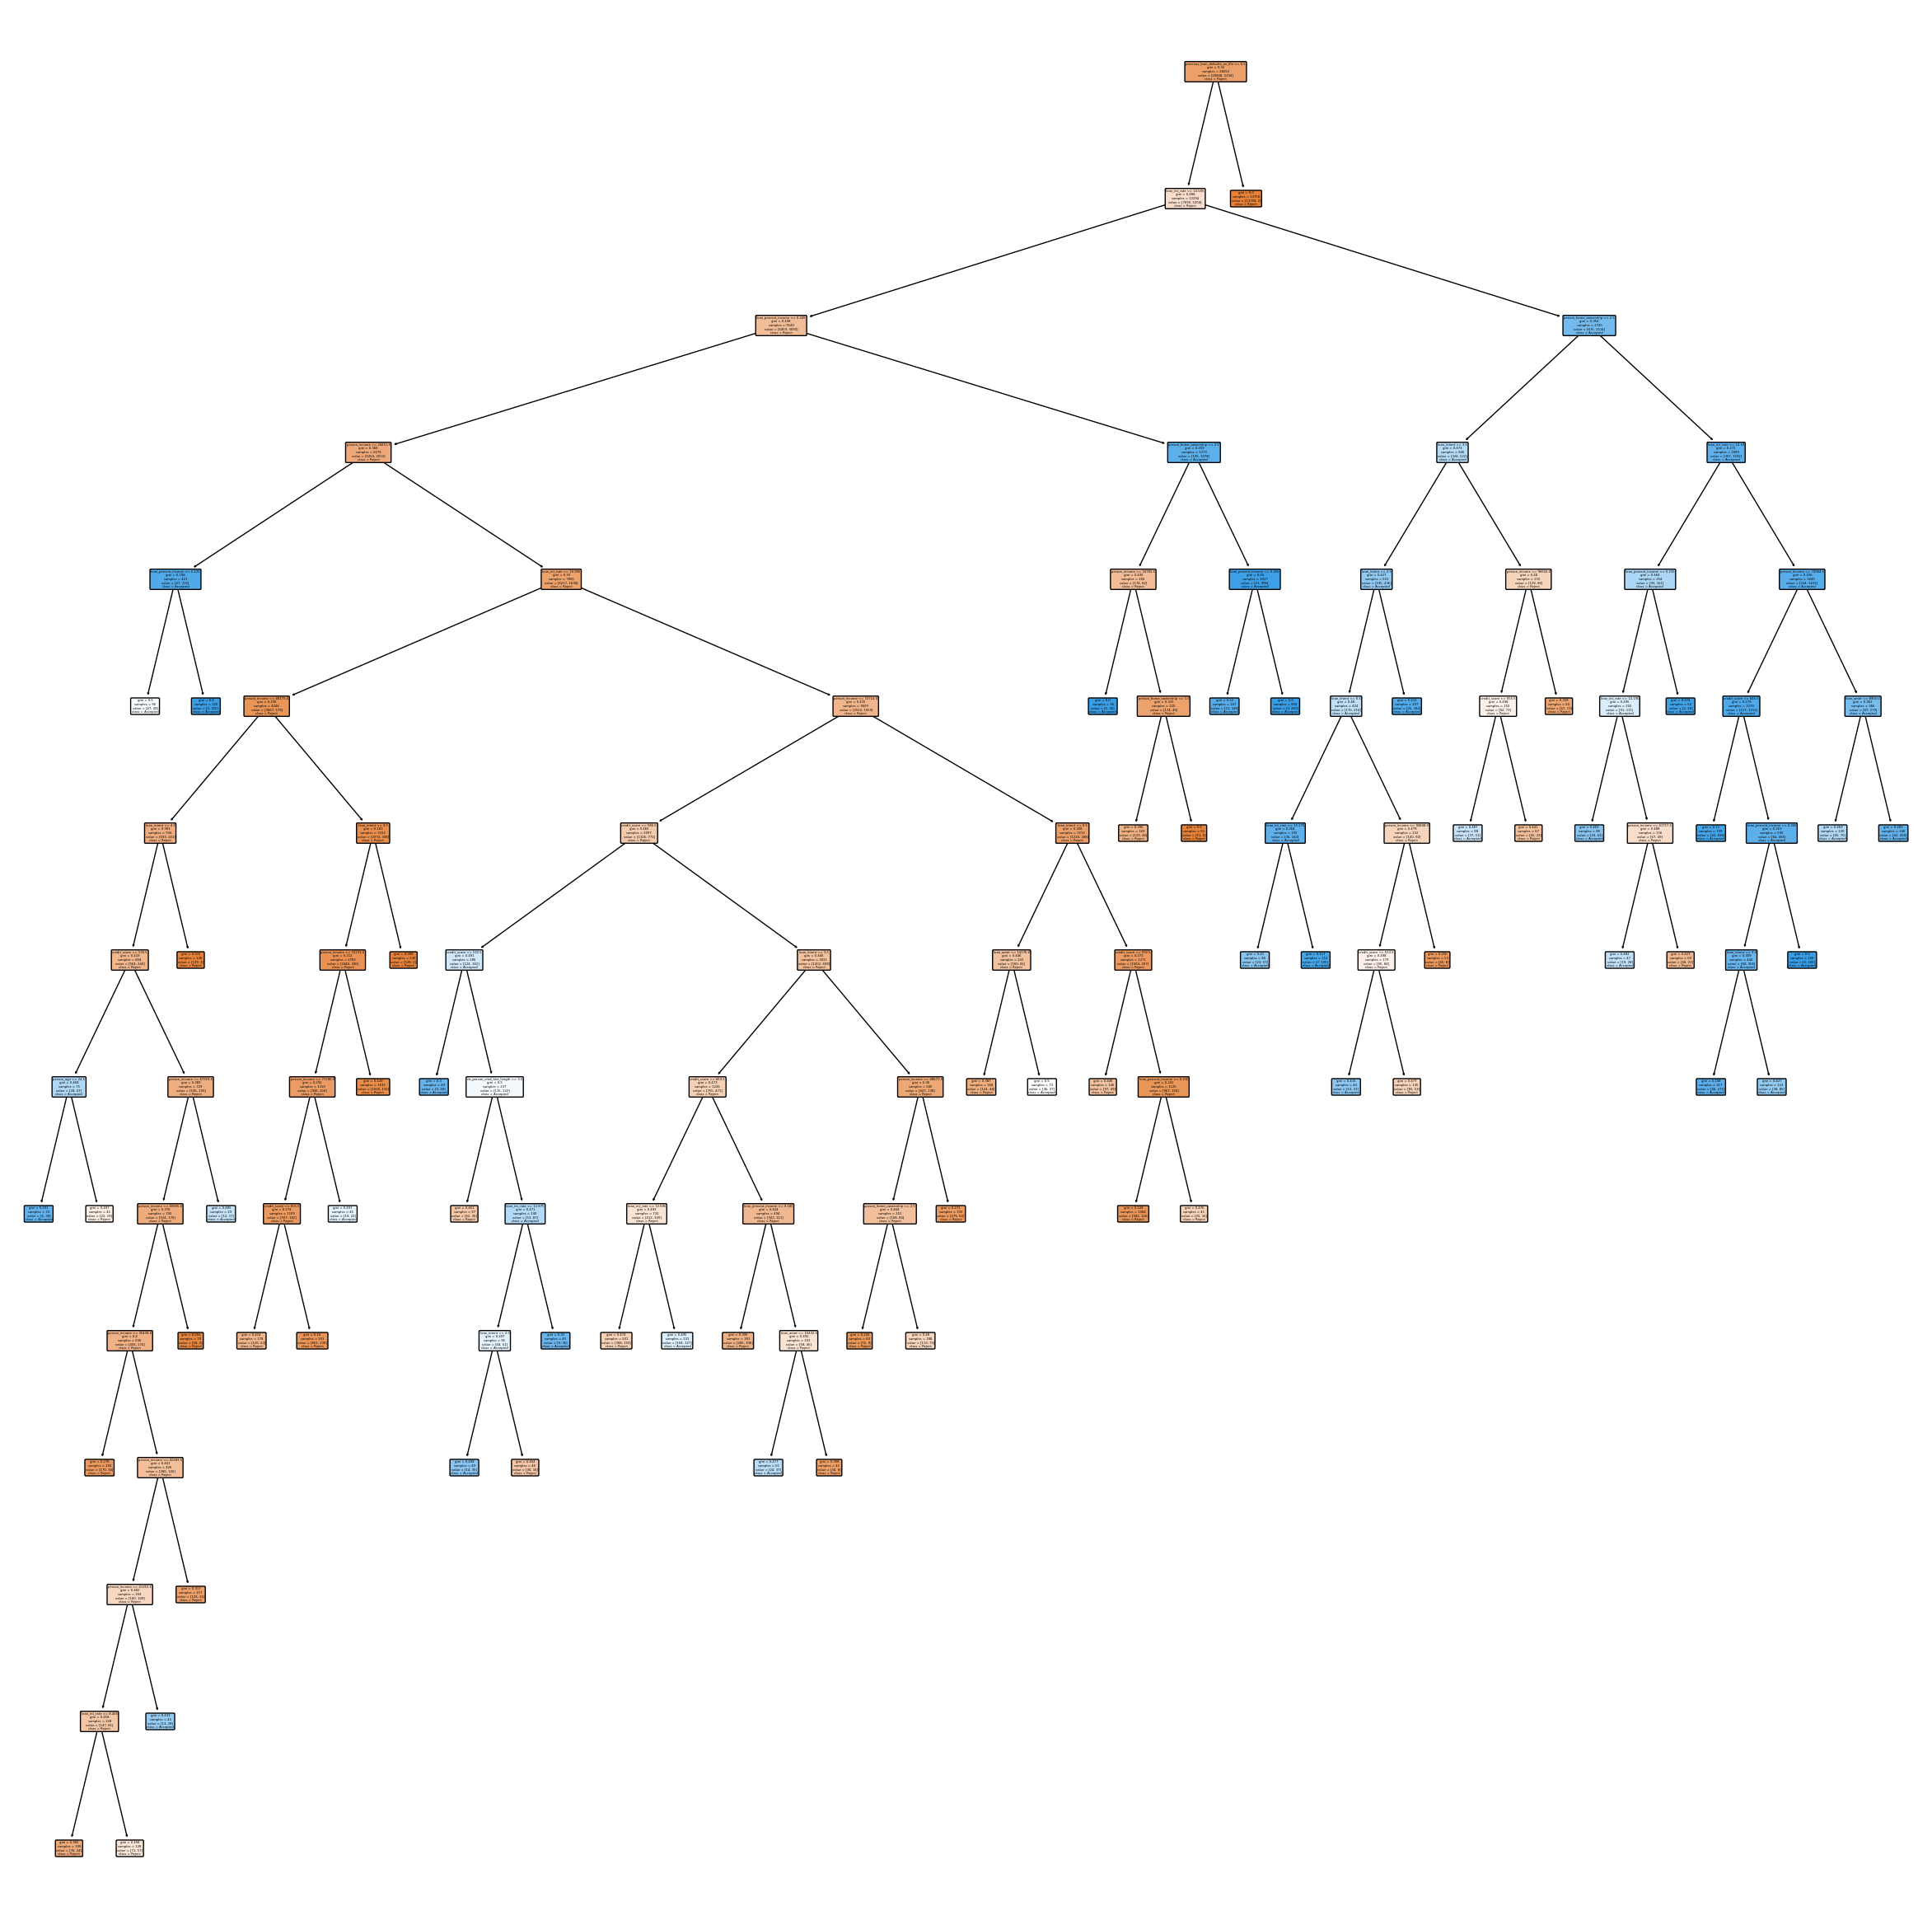

In [30]:
plt.figure(figsize=(30, 30))
plot_tree(ndt,filled=True,feature_names=x_t.columns, class_names=['Reject','Accepted'],rounded=True)
plt.show()
# the tree is not clearly visible (sorry for that :(  )

## Random Forest  ##

In [31]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
       'max_features':['sqrt','log2',None],'n_estimators':[50]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 50, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'entropy'}
0.9224628975212967


In [32]:
pred1t=nrf.predict(x_t)
pred1=nrf.predict(x_te)

****
# Evaluation Metrics #
****

In [33]:
# importing

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [34]:
# let us create dataframes for our training and testing evalaution metrics

etdf=pd.DataFrame({'Classification Model':['Decision Tree Classifier','Random Forest Classifier'],
                 'Training Accuracy':[accuracy_score(y_t,predt),accuracy_score(y_t,pred1t)],
                 'Training Precision':[precision_score(y_t,predt),precision_score(y_t,pred1t)],
                 'Training Recall':[recall_score(y_t,predt),recall_score(y_t,pred1t)],
                 'Training F1 Score':[f1_score(y_t,predt),f1_score(y_t,pred1t)]})

etedf=pd.DataFrame({'Classification Model':['Decision Tree Classifier','Random Forest Classifier'],
                 'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1)],
                 'Testing Precision':[precision_score(y_te,pred),precision_score(y_te,pred1)],
                 'Testing Recall':[recall_score(y_te,pred),recall_score(y_te,pred1)],
                 'Testing F1 Score':[f1_score(y_te,pred),f1_score(y_te,pred1)]})

In [35]:
print('Classification Reports for Training\n\n')
print('Decision Tree Classifier\n',classification_report(y_t,predt),'\n\n')
print('Random Forest Classifier\n',classification_report(y_t,pred1t),'\n\n')

Classification Reports for Training


Decision Tree Classifier
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     20848
           1       0.85      0.73      0.79      5204

    accuracy                           0.92     26052
   macro avg       0.89      0.85      0.87     26052
weighted avg       0.92      0.92      0.92     26052
 


Random Forest Classifier
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     20848
           1       0.95      0.83      0.88      5204

    accuracy                           0.96     26052
   macro avg       0.95      0.91      0.93     26052
weighted avg       0.96      0.96      0.96     26052
 




In [36]:
print('Classification Reports for Testing\n\n')
print('Decision Tree Classifier\n',classification_report(y_te,pred),'\n\n')
print('Random Forest Classifier\n',classification_report(y_te,pred1),'\n\n')

Classification Reports for Testing


Decision Tree Classifier
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6916
           1       0.83      0.71      0.76      1768

    accuracy                           0.91      8684
   macro avg       0.88      0.84      0.85      8684
weighted avg       0.91      0.91      0.91      8684
 


Random Forest Classifier
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6916
           1       0.86      0.71      0.78      1768

    accuracy                           0.92      8684
   macro avg       0.89      0.84      0.86      8684
weighted avg       0.91      0.92      0.91      8684
 




In [37]:
# Training Metrics 

etdf

,Classification Model,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Decision Tree Classifier,0.920467,0.848930,0.732129,0.786215
1,Random Forest Classifier,0.956433,0.947438,0.827825,0.883602


In [38]:
# Testing Metrics
etedf

,Classification Model,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Decision Tree Classifier,0.910295,0.825972,0.708710,0.762861
1,Random Forest Classifier,0.916398,0.855389,0.709276,0.775510


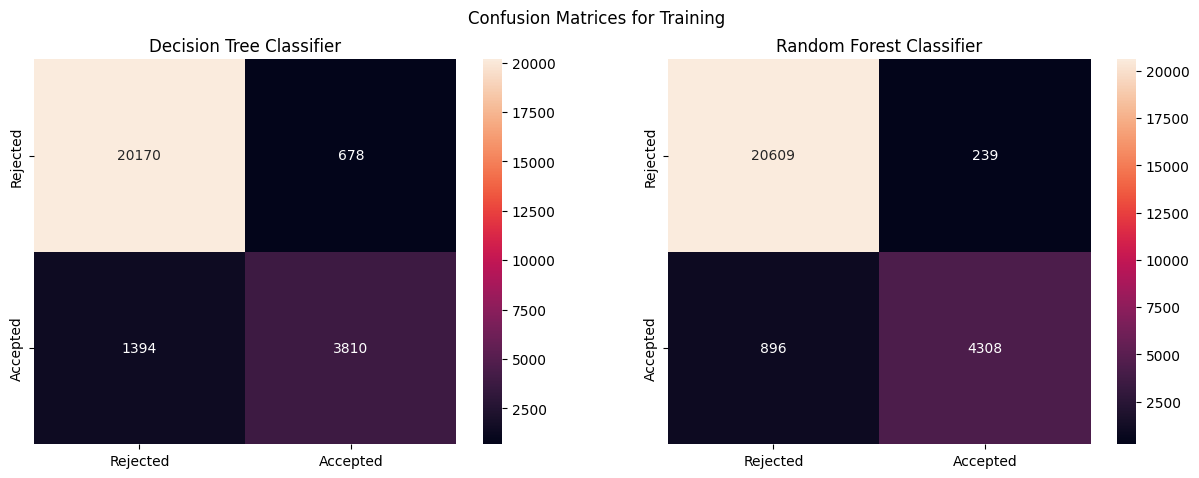

In [39]:
mods=['Decision Tree Classifier','Random Forest Classifier']
labels=['Rejected','Accepted']
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_t,predt),annot=True,fmt='d',ax=ax[0],xticklabels=labels,yticklabels=labels)
ax[0].set_title(mods[0])
sns.heatmap(confusion_matrix(y_t,pred1t),annot=True,fmt='d',ax=ax[1],xticklabels=labels,yticklabels=labels)
ax[1].set_title(mods[1])
plt.suptitle('Confusion Matrices for Training')
plt.show()

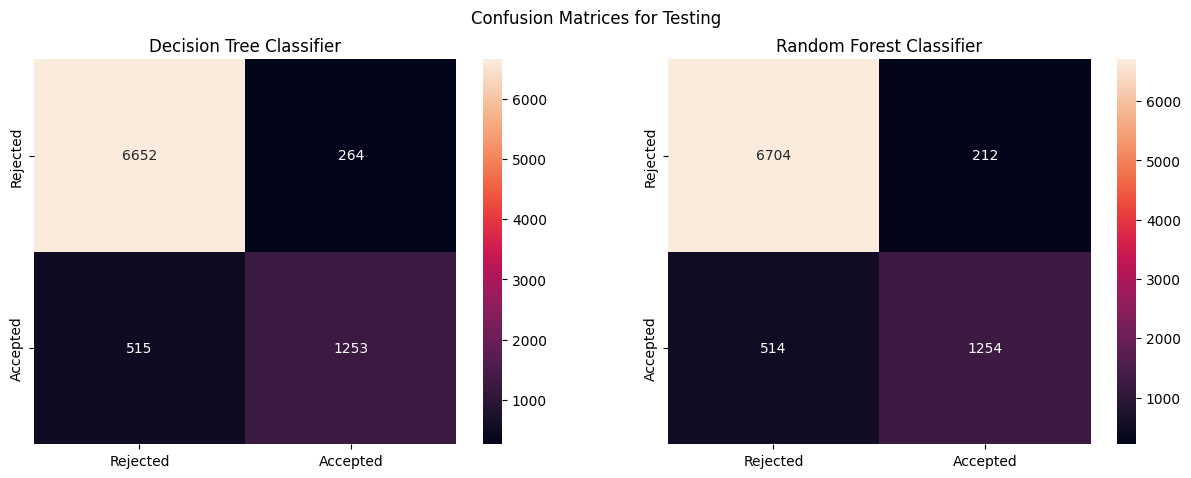

In [40]:
mods=['Decision Tree Classifier','Random Forest Classifier']
labels=['Rejected','Accepted']
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_te,pred),annot=True,fmt='d',ax=ax[0],xticklabels=labels,yticklabels=labels)
ax[0].set_title(mods[0])
sns.heatmap(confusion_matrix(y_te,pred1),annot=True,fmt='d',ax=ax[1],xticklabels=labels,yticklabels=labels)
ax[1].set_title(mods[1])
plt.suptitle('Confusion Matrices for Testing')
plt.show()

****
# Feedback and Suggestions #
****

**Kindly provide feedback and suggestions to improve this notebook**

**Kindly upvote if you liked this notebook or you found this helpful  :)**